In [26]:
## Exploring algorithms for UFC project
import pandas as pd
import os
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_validate
from sklearn.model_selection import train_test_split

In [27]:
path = os.getcwd()
p = path.removesuffix('ufcPredictionProject')
p = p+'UFCdata.csv'


df = pd.read_csv(p)
print(df.shape)
df.head(3)

(6012, 144)


,R_fighter,B_fighter,Referee,date,location,Winner,title_bout,weight_class,B_avg_KD,B_avg_opp_KD,...,R_win_by_Decision_Unanimous,R_win_by_KO/TKO,R_win_by_Submission,R_win_by_TKO_Doctor_Stoppage,R_Stance,R_Height_cms,R_Reach_cms,R_Weight_lbs,B_age,R_age
0,Aalon Cruz,Spike Carlyle,Scott Howard,2/29/2020,"Norfolk, Virginia, USA",Blue,False,Featherweight,NaN,NaN,...,0,0,0,0,Switch,182.88,198.12,145.0,26.0,30.0
1,Aaron Phillips,Matt Hobar,Kevin Nix,8/23/2014,"Tulsa, Oklahoma, USA",Blue,False,Bantamweight,0.0,0.0,...,0,0,0,0,Southpaw,175.26,180.34,135.0,27.0,25.0
2,Aaron Riley,Justin Salas,Randy Corley,7/27/2013,"Seattle, Washington, USA",Blue,False,Lightweight,0.0,1.0,...,3,0,0,0,Southpaw,172.72,175.26,155.0,31.0,32.0


In [28]:
# removing features that are anticipated to not be significant
df = df.drop(['R_fighter','B_fighter','Referee','location'],axis=1)

# removing rows that contain NaN
df.dropna(inplace=True)
print(df.shape)
df.head(3)
print(df.isnull().sum().sum())

(3914, 140)
0


In [29]:
# test train split
(df_train,df_test) = train_test_split(df, train_size = 0.8)

X_train = df_train.drop('Winner',axis=1)
y_train = df_train.Winner
X_test = df_test.drop('Winner',axis=1)
y_test = df_test.Winner

X = X_train
y = y_train

print(X.isnull().sum().sum())

0


In [30]:
# make time a continuous feature
X.date = pd.to_datetime(X.date)
X.date = pd.to_numeric(X.date)

In [31]:
# split features into numerical and categorical
X_num = X.select_dtypes(include='number')
X_cat = X.select_dtypes(exclude='number')

In [32]:
# one hot encode
X_cat = pd.get_dummies(X_cat)

In [33]:
# finding columns that are all zeros from X_num
cols = pd.Series(X_num.columns)
for i in range(len(cols)):
    if (X_num.iloc[:,i] == 0).all():
        print(cols[i])

B_draw
R_draw


In [34]:
# removing columns of zeros
X_num = X_num.drop(['B_draw', 'R_draw'], axis=1)

In [35]:
# standardize
X_num = (X_num - X_num.mean())/X_num.std()

In [36]:
# put back together
X = pd.concat([X_num,X_cat], axis=1)

In [37]:
X.head()

,date,B_avg_KD,B_avg_opp_KD,B_avg_SIG_STR_pct,B_avg_opp_SIG_STR_pct,B_avg_TD_pct,B_avg_opp_TD_pct,B_avg_SUB_ATT,B_avg_opp_SUB_ATT,B_avg_REV,...,weight_class_WomenFlyweight,weight_class_WomenStrawweight,B_Stance_Open Stance,B_Stance_Orthodox,B_Stance_Southpaw,B_Stance_Switch,R_Stance_Open Stance,R_Stance_Orthodox,R_Stance_Southpaw,R_Stance_Switch
4181,0.584418,-0.525448,0.036349,-0.504604,-0.301239,-0.560353,-0.071090,-0.484238,-0.216590,1.406455,...,0,0,0,0,1,0,0,1,0,0
4220,1.090728,-0.689873,-0.565726,-1.409089,0.139743,-1.110965,0.961066,-0.662110,-0.216590,-0.460622,...,1,0,0,1,0,0,0,0,1,0
1920,-0.160981,0.648651,-0.562591,0.775451,-0.583021,-0.371044,-1.001829,-0.064572,-0.621760,-0.460622,...,0,0,0,1,0,0,0,1,0,0
3124,0.884454,1.283230,-0.565726,0.898908,-0.249962,-1.110965,-1.023849,-0.662110,-0.631484,-0.460622,...,0,0,0,0,1,0,0,1,0,0
1146,0.317200,-0.689873,-0.365034,0.883313,2.057500,0.096145,0.638517,-0.484238,0.820645,1.033039,...,0,0,0,1,0,0,0,1,0,0


In [38]:
# logistic regression
logr = LogisticRegression(random_state=0, max_iter=1000)
logr.fit(X,y)


LogisticRegression(max_iter=1000, random_state=0)

In [39]:
# Training score
print('Training Score:',logr.score(X,y).round(2))

Training R2: 0.69


## Finding Test Error

In [40]:
X_train = X
y_train = y

In [41]:
X = X_test
y = y_test

In [42]:
# make time a continuous feature
X.date = pd.to_datetime(X.date)
X.date = pd.to_numeric(X.date)

In [43]:
# split features into numerical and categorical
X_num = X.select_dtypes(include='number')
X_cat = X.select_dtypes(exclude='number')

In [44]:
# one hot encode
X_cat = pd.get_dummies(X_cat)

In [45]:
# removing columns of zeros
X_num = X_num.drop(['B_draw', 'R_draw'], axis=1)

In [46]:
# standardize
X_num = (X_num - X_num.mean())/X_num.std()

In [47]:
# put back together
X = pd.concat([X_num,X_cat], axis=1)
X.head()

,date,B_avg_KD,B_avg_opp_KD,B_avg_SIG_STR_pct,B_avg_opp_SIG_STR_pct,B_avg_TD_pct,B_avg_opp_TD_pct,B_avg_SUB_ATT,B_avg_opp_SUB_ATT,B_avg_REV,...,weight_class_WomenFlyweight,weight_class_WomenStrawweight,B_Stance_Open Stance,B_Stance_Orthodox,B_Stance_Southpaw,B_Stance_Switch,R_Stance_Open Stance,R_Stance_Orthodox,R_Stance_Southpaw,R_Stance_Switch
2013,1.402261,1.855281,-0.543130,0.064579,-0.760399,-1.150728,-0.014444,0.028436,2.843059,1.160344,...,0,0,0,1,0,0,0,0,1,0
1422,0.076009,-0.615750,-0.543130,0.912726,-0.528492,1.101117,-0.567876,-0.341062,-0.497393,1.166907,...,0,0,0,1,0,0,0,0,1,0
2739,0.307577,-0.695460,-0.543130,-0.170113,0.761595,-1.060103,1.677366,-0.248688,0.341968,0.110127,...,0,0,0,1,0,0,0,1,0,0
1053,1.278667,0.619766,-0.109944,-0.343523,0.766064,-0.519722,-1.007350,-0.306422,-0.283305,-0.467492,...,0,0,0,0,0,1,0,1,0,0
5746,-0.328046,2.492966,-0.543130,-0.024082,-1.082162,-0.967029,1.462022,0.905996,-0.201747,-0.520003,...,0,0,0,1,0,0,0,1,0,0


In [48]:
# logistic regression
logr = LogisticRegression(random_state=0, max_iter=1000)
logr.fit(X_train,y_train)

LogisticRegression(max_iter=1000, random_state=0)

In [49]:
# Test score
print('Test Score:',logr.score(X,y).round(2))

Test R2: 0.61


## Feature Selection

In [51]:
from sklearn.model_selection import GridSearchCV

In [52]:
X_test = X
y_test = y

In [65]:
# LASSO to find insignificant features to drop
grid = {'C':[0.01, 0.1, 1, 10, 100]}

lr_model = LogisticRegression(penalty='l1', solver='liblinear',max_iter=1000)
gs_model = GridSearchCV(estimator=lr_model, param_grid=grid)
gs_model.fit(X_train, y_train)
# TAKES ROUGHLY 6 MINUTES TO RUN!!!

GridSearchCV(estimator=LogisticRegression(max_iter=1000, penalty='l1',
                                          solver='liblinear'),
             param_grid={'C': [0.01, 0.1, 1, 10, 100]})

In [66]:
gs_model.best_params_

{'C': 0.1}

In [141]:
# Train a LR model with best parameters
model = LogisticRegression(C=0.1, penalty='l1', solver='liblinear')
model.fit(X_train, y_train)

LogisticRegression(C=0.1, penalty='l1', solver='liblinear')

In [142]:
# viewing coefficients after LASSO
coef = model.coef_[0]
coef

array([ 0.41074762,  0.01320754, -0.0478505 ,  0.        , -0.01778411,
       -0.09027811, -0.05548965,  0.        , -0.02338459,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        , -0.0886608 ,  0.        , -0.0904293 ,  0.17991392,
        0.03508541,  0.12059741,  0.00723929,  0.04549875,  0.        ,
        0.        , -0.00155081,  0.07710685,  0.        ,  0.        ,
       -0.03197165,  0.        , -0.00138016,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        , -0.0299596 ,  0.09253721,  0.        ,
       -0.03010606, -0.02201536,  0.        ,  0.        ,  0.03835483,
        0.        , -0.10611867,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        , -0.05014542, -0.0777915 ,  0.06319314,
        0.        ,  0.        ,  0.        ,  0.        ,  0.09125835,
        0.00397898,  0.        ,  0.01272716, -0.04873932,  0.09

In [143]:
# storing coefficients and feature name in data frame
coef_df = pd.DataFrame()
coef_df['features'] = X_train.columns
coef_df['coefficient'] = coef
print(coef_df.shape)
print(coef_df.iloc[0,1])
coef_df.head()

(155, 2)
0.4107476194490943


,features,coefficient
0,date,0.410748
1,B_avg_KD,0.013208
2,B_avg_opp_KD,-0.047850
3,B_avg_SIG_STR_pct,0.000000
4,B_avg_opp_SIG_STR_pct,-0.017784


In [145]:
# remove features with zero coefficients
coef_df = coef_df[coef_df['coefficient'] != 0]
coef_df = coef_df.sort_values(by=['coefficient'],ascending=False)

print(coef_df.shape)
coef_df.head()

(60, 2)


,features,coefficient
0,date,0.410748
132,R_age,0.243267
19,B_avg_TD_att,0.179914
113,R_avg_opp_CTRL_time(seconds),0.134021
123,R_win_by_Decision_Split,0.127800


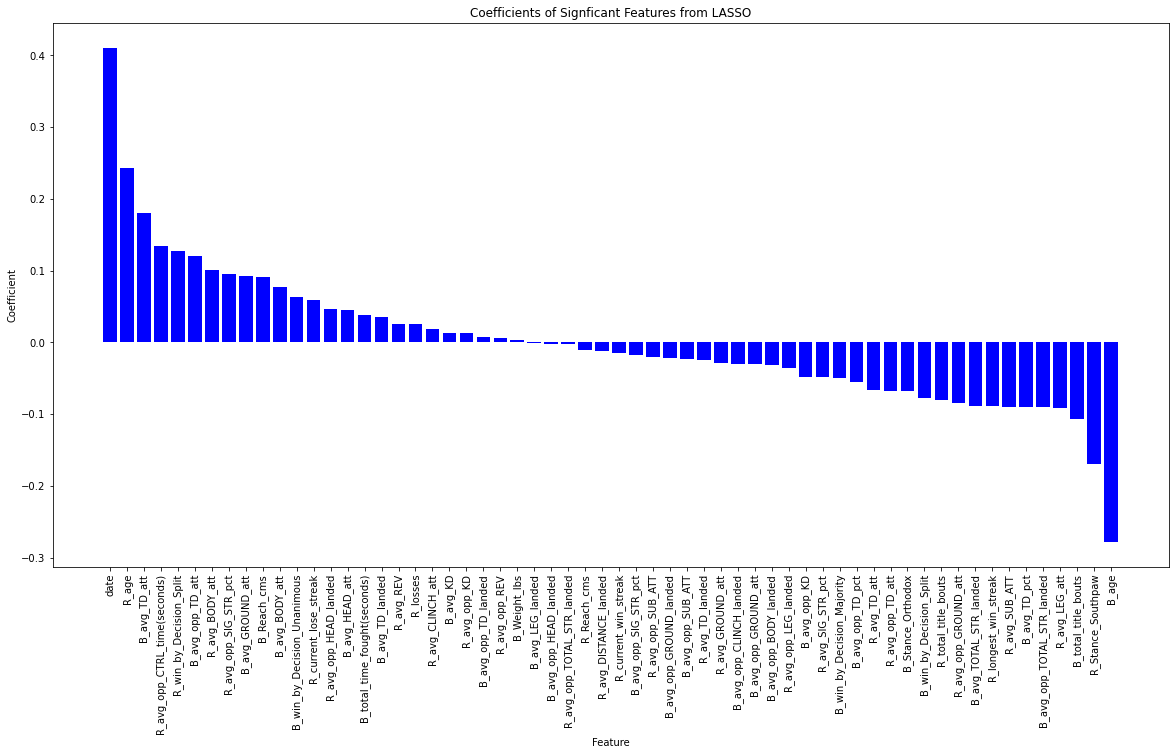

In [146]:
# plot coefficients
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 10))
plt.bar('features', 'coefficient', data = coef_df, color = "blue")
plt.xlabel("Feature")
plt.xticks(rotation = 90)
plt.ylabel("Coefficient")
plt.title("Coefficients of Signficant Features from LASSO")
plt.show()

In [147]:
# removing insifnificant features from X
X_train_imp = X_train[coef_df.features]
X_test_imp = X_test[coef_df.features]
X_train_imp.head(3)

,date,R_age,B_avg_TD_att,R_avg_opp_CTRL_time(seconds),R_win_by_Decision_Split,B_avg_opp_TD_att,R_avg_BODY_att,R_avg_opp_SIG_STR_pct,B_avg_GROUND_att,B_Reach_cms,...,R_avg_opp_GROUND_att,B_avg_TOTAL_STR_landed,R_longest_win_streak,R_avg_SUB_ATT,B_avg_TD_pct,B_avg_opp_TOTAL_STR_landed,R_avg_LEG_att,B_total_title_bouts,R_Stance_Southpaw,B_age
4181,0.584418,0.185820,-0.249530,0.364641,-0.584165,0.287842,-0.568049,0.426120,-0.791999,-0.290170,...,0.188001,-0.039019,-0.460112,-0.470757,-0.560353,0.425212,0.130221,-0.286413,0,-0.449929
4220,1.090728,-1.735910,-0.954831,2.583340,-0.584165,-0.614701,0.366474,1.729676,-0.845706,-0.042818,...,0.921051,0.891394,-0.931362,3.925844,-1.110965,1.206437,0.074975,-0.286413,1,-0.200155
1920,-0.160981,0.426037,0.550132,1.831284,0.870903,-1.057294,0.017798,0.191589,0.068048,1.441291,...,0.004739,-0.729748,1.424887,0.169408,-0.371044,-0.848279,-0.396738,0.459023,0,0.549169


In [148]:
# Rerunning Logistic Regression with reduced feature set
logr = LogisticRegression(random_state=0, max_iter=1000)
logr.fit(X_train_imp,y_train)

LogisticRegression(max_iter=1000, random_state=0)

In [149]:
# Scores
print('Train Score:',logr.score(X_train_imp,y_train).round(2))
print('Test Score:',logr.score(X_test_imp,y_test).round(2))

Train R2: 0.67
Test R2: 0.62
